# **Customer & Revenue Analysis: KPIs, Trends, and Strategic Insights**
<hr style="border:1px solid #444;">

### **Objective**
This notebook presents a structured analysis of 10,000 sampled e-commerce transactions to uncover key business insights across revenue performance, customer behavior, and product trends. The goal is to translate raw transactional data into actionable KPIs and patterns that can support strategic decisions in marketing, inventory, pricing, and retention.

Analytical focus areas include:
- Revenue breakdowns and customer spend distribution
- Time-based sales trends and seasonality
- Product and payment preferences
- Customer segmentation and RFM-style behavior insights
- Correlation analysis for modeling and forecasting

### **Notebook Structure**
The notebook is organized into the following sections (top-to-bottom):

1. Dataset Overview
2. Key KPIs Summary  
3. Sales Trends Over Time
4. Product Category Insights
5. Payment Method Analysis
6. Outlier and Distribution Analysis
7. Customer Spending Patterns 
8. Correlation Analysis
9. Summary Insights and Recommendations

---

### Section 1: Dataset Overview

Initial sampling of 10,000 e-commerce transactions from a 10M-record dataset to assess structure, data types, and overall readiness for analysis

In [2]:
# Essential imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv("../../data/ecommerce_transactions.csv", parse_dates=["purchase_date"])

# Basic info
print("Dataset Shape:", df.shape)
display(df.head())

# Descriptive statistics
display(df.describe(include='all').head())

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (10000, 6)


,transaction_id,customer_id,product_category,purchase_amount,payment_method,purchase_date
0,T000000,C4853,Toys,150.15,Gift Card,2024-08-23
1,T000001,C5982,Toys,98.75,Credit Card,2024-08-16
2,T000002,C5517,Beauty,13.56,Gift Card,2024-12-24
3,T000003,C1965,Clothing,18.73,Credit Card,2024-08-12
4,T000004,C9636,Beauty,43.63,Crypto,2024-07-14


,transaction_id,customer_id,product_category,purchase_amount,payment_method,purchase_date
count,10000,10000,10000,10000.000000,10000,10000
unique,10000,6072,5,NaN,4,NaN
top,T009983,C7371,Beauty,NaN,Crypto,NaN
freq,1,6,2049,NaN,2565,NaN
mean,NaN,NaN,NaN,80.032294,NaN,2024-12-24 14:55:40.800000



Missing Values:
transaction_id      0
customer_id         0
product_category    0
purchase_amount     0
payment_method      0
purchase_date       0
dtype: int64


**Key Highlights:**
- All records include structured fields such as `customer_id`, `purchase_amount`, `purchase_date`, `product_category`, and `payment_method`.
- Data is well-typed and cleaned, with dates parsed as datetime and monetary fields formatted as floats.
- No missing values were detected, indicating high completeness and minimal preprocessing required.

**Data Readiness Insight:** The clean structure and completeness of the dataset make it ideal for fast, reliable analysis—including tasks like trend tracking, anomaly detection, and customer segmentation.

<hr style="border:1px solid #444;">

### Section 2: Key KPIs Summary

Presents core performance metrics across the dataset, providing a baseline for evaluating revenue generation, customer behavior, and transaction efficiency

In [3]:
# Compute key metrics
total_revenue = df['purchase_amount'].sum()
avg_order_value = df['purchase_amount'].mean()
unique_customers = df['customer_id'].nunique()
total_transactions = len(df)

# KPI Chart - 2x2 layout
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode='number',
    value=total_revenue,
    number={'prefix': "$", 'valueformat': ',.2f'},
    title={'text': "<b>Total Revenue</b>"},
    domain={'row': 0, 'column': 0}
))

fig.add_trace(go.Indicator(
    mode='number',
    value=avg_order_value,
    number={'prefix': "$", 'valueformat': ',.2f'},
    title={'text': "<b>Average Order Value</b>"},
    domain={'row': 0, 'column': 1}
))

fig.add_trace(go.Indicator(
    mode='number',
    value=unique_customers,
    title={'text': "<b>Unique Customers</b>"},
    domain={'row': 1, 'column': 0}
))

fig.add_trace(go.Indicator(
    mode='number',
    value=total_transactions,
    title={'text': "<b>Total Transactions</b>"},
    domain={'row': 1, 'column': 1}
))

fig.update_layout(
    grid={'rows': 2, 'columns': 2, 'pattern': "independent"},
    height=500,
    template='plotly_white',
    title_text="Key Business KPIs"
)

fig.show()



**Key Metrics:**
- **Total Revenue:** $800,322.94  
- **Average Order Value (AOV):** $80.03  
- **Total Transactions:** 10k  
- **Unique Customers:** 6,070  
- **Avg. Orders per Customer:** ~1.65  

**Strategic Takeaway:**  These KPIs reveal a moderately high average order value paired with low repeat purchase frequency. The business may benefit from campaigns that encourage re-engagement or introduce subscription and loyalty programs to increase lifetime value.

<hr style="border:1px solid #444;">

### Section 3: Sales Trends Over Time

Tracks monthly revenue performance to uncover seasonal patterns, anomalies, and potential business cycles

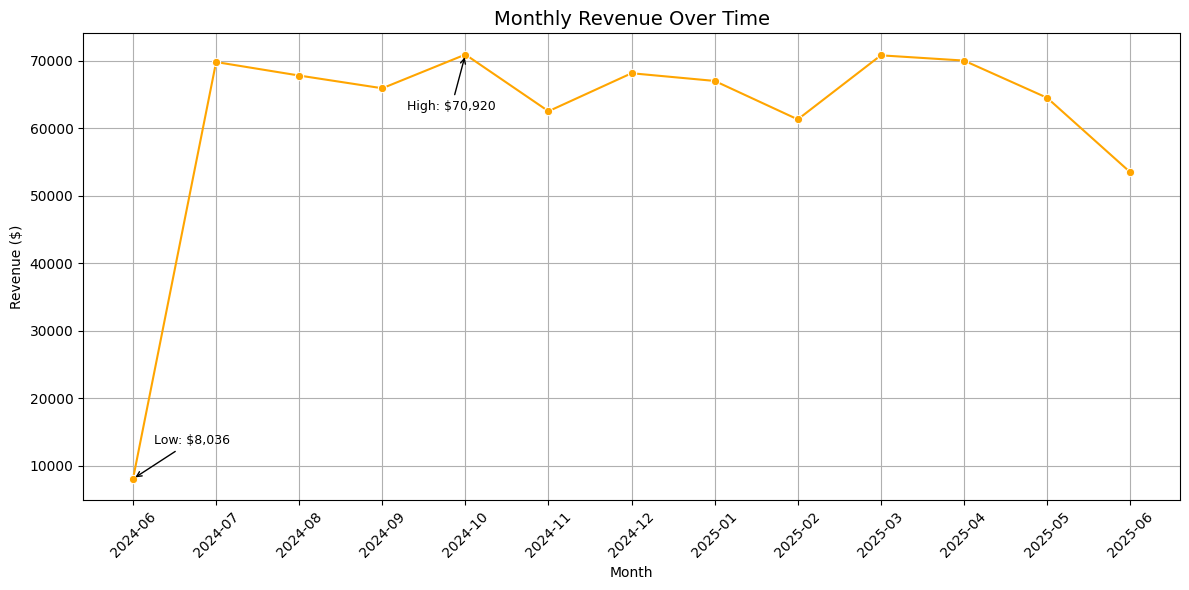

In [4]:
# Extract year and month
df['year_month'] = df['purchase_date'].dt.to_period('M')
monthly_revenue = df.groupby('year_month')['purchase_amount'].sum().reset_index()
monthly_revenue['year_month'] = monthly_revenue['year_month'].astype(str)

# Calculate MoM Growth
monthly_revenue['MoM_Growth'] = monthly_revenue['purchase_amount'].pct_change() * 100

# Annotate highs and lows
max_month = monthly_revenue.loc[monthly_revenue['purchase_amount'].idxmax()]
min_month = monthly_revenue.loc[monthly_revenue['purchase_amount'].idxmin()]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='year_month', y='purchase_amount', marker='o', color='orange')
plt.xticks(rotation=45)
plt.title('Monthly Revenue Over Time', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True)

plt.annotate(f"High: ${max_month['purchase_amount']:,.0f}",
             xy=(max_month['year_month'], max_month['purchase_amount']),
             xytext=(-10, -40),
             textcoords='offset points',
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             ha='center', fontsize=9)

plt.annotate(f"Low: ${min_month['purchase_amount']:,.0f}",
             xy=(min_month['year_month'], min_month['purchase_amount']),
             xytext=(15, 25),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             ha='left', fontsize=9)

plt.tight_layout()
plt.savefig('../../assets/KPI_analysis/monthly_revenue_over_time.png', bbox_inches='tight', dpi=300)
plt.show()


**Interpretation:**

- Revenue peaked in **October 2024** at approximately **$71K**, reflecting a strong Q4 sales cycle.
- **June 2024** recorded the lowest monthly revenue at just **$8K**, suggesting ramp-up from an initial soft launch or seasonal dip.
- The strongest MoM growth occured in **March 2025** at **+15.5%**, likely tied to seasonal campaigns or promotions.
- Revenue fell sharply by **-17%** in **June 2025**, marking a potential risk signal that warrants further monitoring.

**Business Context:** Revenue trends reflect mild seasonality, with Q4 and early Q2 offering peak opportunities. Dips in June 2024 and June 2025 suggest this month may consistently underperform and could benefit from targeted incentives or retention efforts.

<hr style="border:1px solid #444;">

### Section 4: Product Category Insights

Insights of customer purchases across product categories, highlighting differences in transaction volume and revenue contribution

In [14]:
# Transaction Volume by Category
cat_count = df['product_category'].value_counts().reset_index()
cat_count.columns = ['product_category', 'count']

fig = px.bar(
    cat_count,
    x='product_category',
    y='count',
    color='count',
    color_continuous_scale='Blues',
    text='count',
    title="Product Categories by Transaction Volume",
    labels={'product_category': 'Product Category', 'count': 'Transaction Count'}
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    yaxis_title="Number of Transactions",
    xaxis_title="Product Category",
    coloraxis_showscale=False,
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

top_cat = cat_count.iloc[0]
fig.add_annotation(
    x=top_cat['product_category'],
    y=top_cat['count'] + 150,
    text=f"Top category: {top_cat['product_category']} ({top_cat['count']} transactions)",
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowcolor="gray",
    ax=0,
    ay=-40,
    font=dict(size=12, color="black"),
    bgcolor="white",
    bordercolor="black",
    borderwidth=1
)
fig.write_image('../../assets/KPI_analysis/product_categories_by_transaction_volume.png', scale=3)
fig.show()

# Revenue by Category
category_rev = df.groupby('product_category')['purchase_amount'].sum().reset_index()
category_rev = category_rev.sort_values(by='purchase_amount', ascending=False)

fig2 = px.bar(
    category_rev,
    x='product_category',
    y='purchase_amount',
    color='purchase_amount',
    color_continuous_scale='Purples',
    text='purchase_amount',
    title="Revenue Contribution by Category",
    labels={'product_category': 'Product Category', 'purchase_amount': 'Total Revenue'}
)

fig2.update_traces(texttemplate='$%{text:.2f}', textposition='outside')
fig2.update_layout(
    yaxis_title="Total Revenue ($)",
    xaxis_title="Product Category",
    coloraxis_showscale=False,
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

top_rev = category_rev.iloc[0]
fig2.add_annotation(
    x=top_rev['product_category'],
    y=top_rev['purchase_amount'] + 500,
    text=f"Top revenue: {top_rev['product_category']} (${top_rev['purchase_amount']:.2f})",
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowcolor="gray",
    ax=0,
    ay=-40,
    font=dict(size=12, color="black"),
    bgcolor="white",
    bordercolor="black",
    borderwidth=1
)
fig.write_image('../../assets/KPI_analysis/revenue_contribution_by_category.png', scale=3)
fig2.show()


**Insights:**

- The category **Beauty** leads in both transaction volume (2,049 purchases) and total revenue ($167,391.93), indicating strong customer demand and high-value products.
- **Electronics** and **Clothing** follow closely in volume and revenue, suggesting competitive performance across top categories.
- Small variance between volume and revenue rankings suggests a relatively balanced pricing structure across categories.
- Targeted investment in Beauty (e.g., bundling, loyalty programs, or timed promotions) may offer high return on both growth and profitability.

**Strategic Focus:** Prioritize the Beauty category for marketing and pricing strategy, while continuing to monitor Electronics and Clothing as competitive drivers of core revenue.

<hr style="border:1px solid #444;">

### Section 5: Payment Method Analysis

Analyzes customer payment preferences to inform checkout UX, promotions, and potential partnerships

In [6]:
fig = px.pie(
    df,
    names='payment_method',
    title='Payment Method Distribution',
    hole=0.4
)

fig.update_traces(
    textinfo='percent+label',
    textposition='inside',
    pull=[0.03] * df['payment_method'].nunique()
)

fig.update_layout(
    title_x=0.5,
    showlegend=True,
    legend=dict(
        orientation="h", 
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=60, b=80, l=40, r=40)
)
fig.write_image('../../assets/KPI_analysis/payment_method_distribution.png', scale=3)
fig.show()


**Key Highlights:**

- **Crypto** accounts for the largest share of transactions at 25.7%, slightly edging out other methods.
- **Gift Cards** follow closely at **25.3%**, indicating high usage of prepaid balances or store credits.
- **Credit Cards** and **PayPal** are equally popular at **24.5%** each, reflecting conventional digital payment adoption.
- Overall distribution is highly balanced, suggesting no dominant method but multiple well-utilized options.

**Recommendation:** Consider tailoring promotions or checkout flows by surfacing preferred payment methods first or offering incentives tied to underutilized methods to balance operational costs and improve conversion.

<hr style="border:1px solid #444;">

### Section 6: Outlier and Distribution Analysis

Detects unusually large purchases or anomalies using histograms and boxplots, which could indicate bulk orders, fraud, or returns

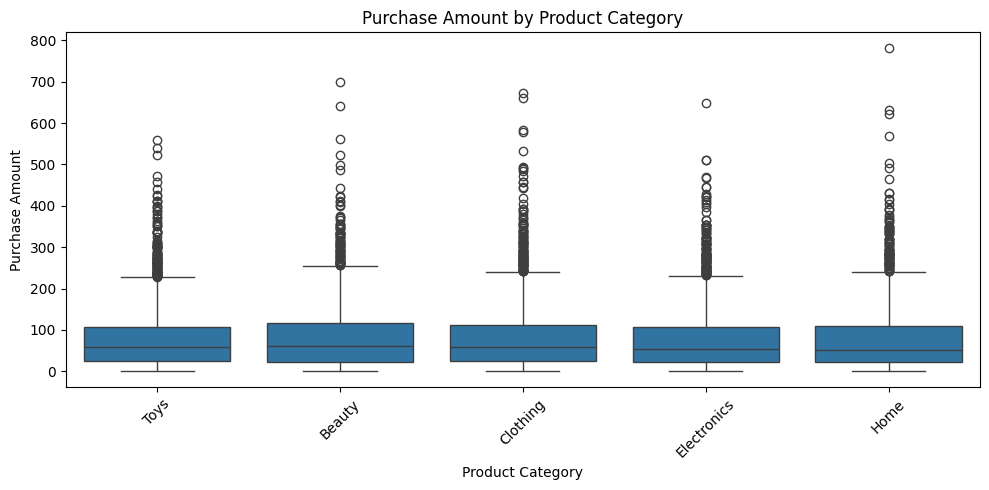

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='product_category', y='purchase_amount')
plt.title('Purchase Amount by Product Category')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount')
plt.tight_layout()
plt.savefig('../../assets/KPI_analysis/purchase_amount_product_by_category_outlier_distribution.png', bbox_inches='tight', dpi=300)
plt.show()


**Boxplot Highlights:**

- All product categories exhibit substantial outliers, with purchases exceeding $500 in each case.
- The interquartile range (IQR) is relatively consistent across categories (~$20–$120).
- Beauty and Home categories show slightly higher median values.
- High-value outliers in every category suggest further segmentation or potential fraud/bulk-ordering behavior.

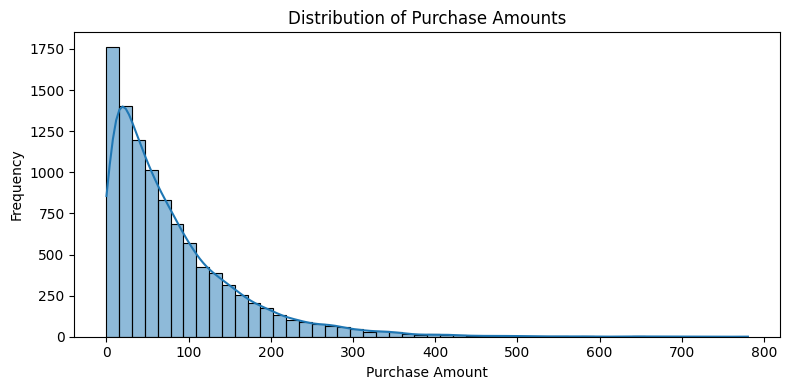

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df['purchase_amount'], bins=50, kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('../../assets/KPI_analysis/distribution_of_purchase_amounts.png', bbox_inches='tight', dpi=300)
plt.show()


**Histogram Highlights:**

- Purchase amounts are heavily right-skewed — dominated by low-value transactions.
- Most purchases fall between $0–$100, peaking around $20–$40.
- A long tail extends toward extreme purchases (~$800), confirming the presence of infrequent but extreme outliers.

**Business Insight:** This spending pattern indicates a mix of small-scale retail activity and sporadic high-value orders. Tailored fraud detection rules or segmentation logic should be applied for enterprise vs. retail customers.

<hr style="border:1px solid #444;">

### Section 7: Customer Spending Patterns

Summarizes customer-level spend behavior to identify loyal or high-value customers

In [13]:
cust_spend = df.groupby('customer_id')['purchase_amount'].sum().reset_index()
fig = px.histogram(cust_spend, x='purchase_amount', nbins=50,
                   title='Total Spend Per Customer',
                   labels={'purchase_amount': 'Total Spend'})
fig.write_image('../../assets/KPI_analysis/total_spend_per_customer.png', scale=3)
fig.show()


**Key Takeaways:**

- Most customers spend between $0–$300, suggesting generally modest purchase activity.
- Distribution is right-skewed with a long tail of high spenders.
- A few customers reach or exceed $800–$1000, indicating VIP or high-value segments.

**Recommendation:**  Use spend thresholds to build loyalty tiers or targeted retention campaigns. Focus marketing efforts on nurturing high-spend users while re-engaging those near churn thresholds.

<hr style="border:1px solid #444;">

### Section 8: Correlation Analysis

Explores interdependencies between numeric features to uncover potential predictive signals or multicollinearity

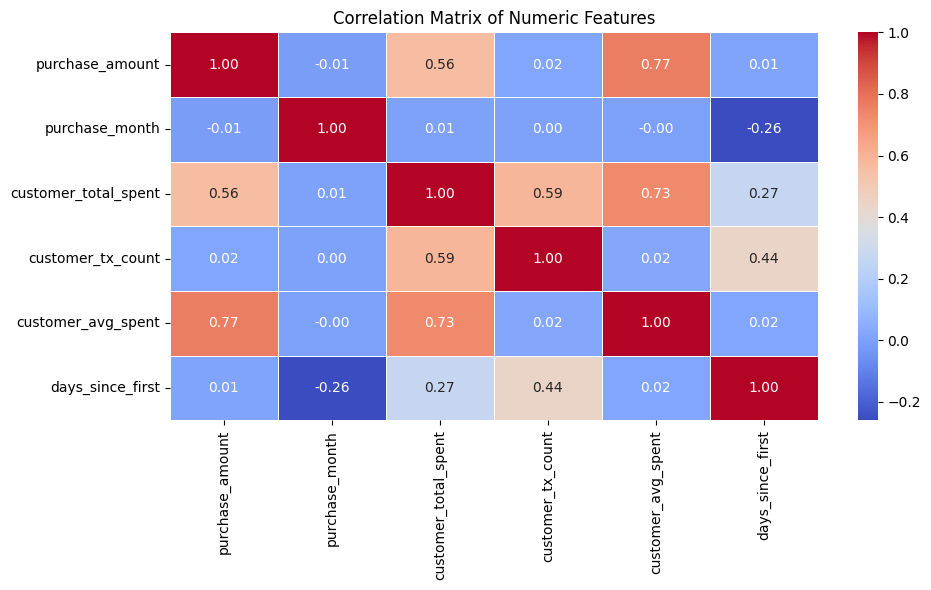

In [10]:
# Generate additional numeric features for correlation analysis
df['purchase_month'] = df['purchase_date'].dt.month

df['customer_total_spent'] = df.groupby('customer_id')['purchase_amount'].transform('sum')
df['customer_tx_count'] = df.groupby('customer_id')['purchase_amount'].transform('count')
df['customer_avg_spent'] = df.groupby('customer_id')['purchase_amount'].transform('mean')
df['days_since_first'] = (df['purchase_date'] - df.groupby('customer_id')['purchase_date'].transform('min')).dt.days

# Select numeric columns for correlation matrix
num_cols = df[['purchase_amount', 'purchase_month', 'customer_total_spent',
               'customer_tx_count', 'customer_avg_spent', 'days_since_first']]

# Compute and plot correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

corr = num_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.savefig('../../assets/KPI_analysis/correlation_matrix_of_numeric_features.png', bbox_inches='tight', dpi=300)
plt.show()


**Modeling Insights:**

- **Strong correlations** observed between:
  - `purchase_amount` and `customer_avg_spent` (**0.77**): Suggests per-transaction value is a reliable signal of spending behavior.
  - `customer_total_spent` and both `purchase_amount` (**0.56**) and `customer_avg_spent` (**0.73**): Indicates total spend is heavily influenced by average order value.
- **Low or near-zero correlations** between `purchase_month` and other features suggest minimal seasonality at the individual level.
- `days_since_first` shows **moderate positive correlation** with `customer_tx_count` (**0.44**), implying customer longevity is weakly tied to engagement.

**Modeling Implications:** Limited correlations reduce multicollinearity risk, supporting better model performance and interpretability. However, engineered features (e.g., customer cohorts, spend frequency bins) may be needed to increase predictive power.

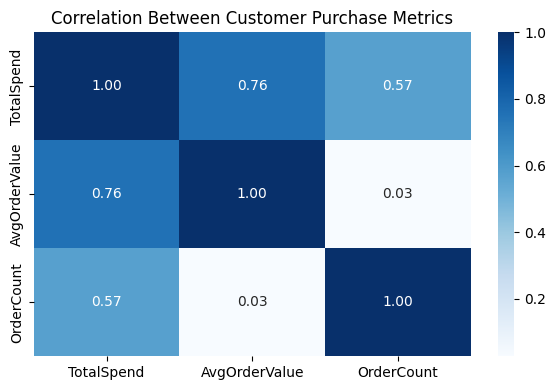

In [11]:
# Correlation analysis across customer-level metrics
customer_summary = df.groupby("customer_id").agg({
    "purchase_amount": ["sum", "mean", "count"]
}).reset_index()

customer_summary.columns = ["customer_id", "TotalSpend", "AvgOrderValue", "OrderCount"]

# Correlation matrix
corr = customer_summary[["TotalSpend", "AvgOrderValue", "OrderCount"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Between Customer Purchase Metrics")
plt.tight_layout()
plt.savefig('../../assets/KPI_analysis/correlation_between_customer_purchase_metrics.png', bbox_inches='tight', dpi=300)
plt.show()


**Business Insights:**

- **TotalSpend** is strongly associated with both **AvgOrderValue** (r = 0.76) and **OrderCount** (r = 0.57), indicating that both order size and frequency matter for revenue growth.
- **AvgOrderValue** and **OrderCount** are nearly uncorrelated (r = 0.03), suggesting distinct customer personas: high-frequency shoppers vs. high-ticket buyers.
- These insights enable better segmentation strategies, such as tailoring loyalty offers to frequent spenders or deploying premium upsells to high-value single-order customers.

**Business Implication:** Distinct buyer types (frequency vs. value-driven) support targeted campaigns, and these traits can be modeled into lifecycle segments or embedded into customer clustering (e.g., for RFM modeling or churn prediction).


<hr style="border:1px solid #444;">

### Section 9: Summary Insights and Recommendations

#### Key Takeaways:

- **Strong Revenue Performance:** The business generated **$800K** in revenue from **10K transactions**, averaging **$80 per order** across **6,070 unique customers**.
- **Seasonality Observed:** Revenue peaked in **October 2024** and dipped in **June 2025**, with noticeable month-over-month growth in **March 2025** suggesting promotional seasonality.
- **Top Categories Drive Value:** **Beauty** led both in volume and revenue, while **Electronics** and **Clothing** also showed strong performance. Strategic focus on top categories may yield outsized returns.
- **Customer Metrics Show Diversity:** Total spend is influenced by both order size and frequency, while weak correlations between average order value and frequency imply distinct customer personas.
- **Low Multicollinearity:** Minimal correlations between numeric features reduce risk for predictive modeling and enable cleaner model training pipelines.

#### Recommendations:

- **Customer Segmentation:** Leverage patterns in average order value and frequency to tailor marketing—e.g., reward repeat buyers with loyalty incentives; upsell premium bundles to high-spend, low-frequency shoppers.
- **Promotional Timing:** Plan promotions and product launches around Q4 and early Q2 cycles where demand is strongest.
- **Category Investment:** Allocate more inventory and marketing efforts to high-performing categories like **Beauty**, using bundling or loyalty programs to maximize ROI.
- **Feature Engineering for Modeling:** Enhance predictive models by engineering features such as **recency/frequency bins**, **category mix ratios**, or **cohort flags** to improve classification or forecasting accuracy.
<hr style="border:1px  #444;">
<hr style="border:1px  #444;">


<hr style="border:1px solid #444;">